In [1]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

In [2]:
landmarks_frame = pd.read_csv('sun_disk_pos_database.2021-03-06.csv', delimiter=';', dtype={'PresentedImageSize_Width': int, 'PresentedImageSize_Height': int, 'pt0_x': float,'pt0_y': float,'pt1_x': float,'pt1_y': float,}) # тут параметр почитать, возможно не будут строками при чтении
landmarks_frame_withR=landmarks_frame.copy(True)

In [3]:
a = np.where(np.isnan(landmarks_frame_withR.pt0_x.values))
a[0]

array([ 132,  450,  594,  613,  661, 1435, 2176, 2221])

In [4]:
landmarks_frame_withR.iloc[132]
#landmarks_frame_withR.iloc[133]

img_filename                 img-2016-10-18T12-59-56devID1.jpg
PresentedImageSize_Width                                  1200
PresentedImageSize_Height                                 1200
pt0_x                                                      NaN
pt0_y                                                      NaN
pt1_x                                                      NaN
pt1_y                                                      NaN
Name: 132, dtype: object

In [5]:
landmarks_frame_withR= landmarks_frame_withR.drop(a[0]) # выкинули NaN

In [6]:
a =np.where(np.isnan(landmarks_frame_withR.pt0_x.values))

In [7]:
a

(array([], dtype=int64),)

In [8]:
landmarks_frame_withR.iloc[132]

img_filename                 img-2016-01-07T13-00-42devID1.jpg
PresentedImageSize_Width                                  1200
PresentedImageSize_Height                                 1200
pt0_x                                                  1075.01
pt0_y                                                  579.438
pt1_x                                                  1117.01
pt1_y                                                  628.438
Name: 133, dtype: object

In [9]:
landmarks_frame_withR

,img_filename,PresentedImageSize_Width,PresentedImageSize_Height,pt0_x,pt0_y,pt1_x,pt1_y
0,img-2018-06-27T08-59-53devID2.jpg,1200,1200,641.000000,955.406250,684.000000,980.406250
1,img-2016-10-25T10-00-01devID2.jpg,1200,1200,412.000000,976.406250,446.000000,993.406250
2,img-2017-02-26T07-00-28devID2.jpg,1200,1200,630.000000,389.406250,671.000000,411.406250
3,img-2017-02-22T04-00-24devID2.jpg,1200,1200,943.000000,893.406250,987.000000,919.406250
4,img-2015-12-30T05-58-24devID2.jpg,1200,1200,977.000000,197.406250,932.000000,238.406250
5,img-2017-03-23T08-00-02devID1.jpg,1200,1200,460.000000,1077.406250,494.000000,1099.406250
6,img-2019-12-08T11-01-21devID1.jpg,1200,1200,1023.000000,281.406250,939.000000,331.406250
7,img-2017-02-18T06-01-50devID1.jpg,1200,1200,466.000000,461.406250,514.000000,488.406250
8,img-2019-12-18T12-58-21devID2.jpg,1200,1200,706.000000,331.406250,780.000000,375.406250
9,img-2017-03-04T05-59-19devID1.jpg,1200,1200,961.000000,871.406250,1034.000000,911.406250


In [10]:
#landmarks_frame_withR['R'] = np.sqrt( np.square(landmarks_frame_withR['pt1_x']-landmarks_frame_withR['pt0_x']) 
                                  #   + np.square(landmarks_frame_withR['pt1_y']-landmarks_frame_withR['pt0_y']))
    
    # пересчет для 1920х1920 изображений
landmarks_frame_withR['pt1_x1920'] = landmarks_frame_withR['pt1_x'] *1920 / 1200
landmarks_frame_withR['pt0_x1920'] = landmarks_frame_withR['pt0_x'] *1920 / 1200
landmarks_frame_withR['pt1_y1920'] = landmarks_frame_withR['pt1_y'] *1920 / 1200
landmarks_frame_withR['pt0_y1920'] = landmarks_frame_withR['pt0_y'] *1920 / 1200
landmarks_frame_withR['R'] = np.sqrt( np.square(landmarks_frame_withR['pt1_x1920']-landmarks_frame_withR['pt0_x1920']) 
                            + np.square(landmarks_frame_withR['pt1_y1920']-landmarks_frame_withR['pt0_y1920']))

In [11]:
landmarks_frame_withR

,img_filename,PresentedImageSize_Width,PresentedImageSize_Height,pt0_x,pt0_y,pt1_x,pt1_y,pt1_x1920,pt0_x1920,pt1_y1920,pt0_y1920,R
0,img-2018-06-27T08-59-53devID2.jpg,1200,1200,641.000000,955.406250,684.000000,980.406250,1094.400000,1025.600000,1568.650000,1528.650000,79.582913
1,img-2016-10-25T10-00-01devID2.jpg,1200,1200,412.000000,976.406250,446.000000,993.406250,713.600000,659.200000,1589.450000,1562.250000,60.821049
2,img-2017-02-26T07-00-28devID2.jpg,1200,1200,630.000000,389.406250,671.000000,411.406250,1073.600000,1008.000000,658.250000,623.050000,74.447297
3,img-2017-02-22T04-00-24devID2.jpg,1200,1200,943.000000,893.406250,987.000000,919.406250,1579.200000,1508.800000,1471.050000,1429.450000,81.772367
4,img-2015-12-30T05-58-24devID2.jpg,1200,1200,977.000000,197.406250,932.000000,238.406250,1491.200000,1563.200000,381.450000,315.850000,97.403080
5,img-2017-03-23T08-00-02devID1.jpg,1200,1200,460.000000,1077.406250,494.000000,1099.406250,790.400000,736.000000,1759.050000,1723.850000,64.795062
6,img-2019-12-08T11-01-21devID1.jpg,1200,1200,1023.000000,281.406250,939.000000,331.406250,1502.400000,1636.800000,530.250000,450.250000,156.407672
7,img-2017-02-18T06-01-50devID1.jpg,1200,1200,466.000000,461.406250,514.000000,488.406250,822.400000,745.600000,781.450000,738.250000,88.116287
8,img-2019-12-18T12-58-21devID2.jpg,1200,1200,706.000000,331.406250,780.000000,375.406250,1248.000000,1129.600000,600.650000,530.250000,137.748757
9,img-2017-03-04T05-59-19devID1.jpg,1200,1200,961.000000,871.406250,1034.000000,911.406250,1654.400000,1537.600000,1458.250000,1394.250000,133.184984


In [12]:
landmarks_sun_frame = landmarks_frame_withR[['img_filename', 'pt0_x1920', 'pt0_y1920', 'R']]
landmarks_sun_frame = landmarks_sun_frame.rename(columns={'pt0_x1920': 'pt0_x', 'pt0_y1920': 'pt0_y'})
landmarks_sun_frame

,img_filename,pt0_x,pt0_y,R
0,img-2018-06-27T08-59-53devID2.jpg,1025.600000,1528.650000,79.582913
1,img-2016-10-25T10-00-01devID2.jpg,659.200000,1562.250000,60.821049
2,img-2017-02-26T07-00-28devID2.jpg,1008.000000,623.050000,74.447297
3,img-2017-02-22T04-00-24devID2.jpg,1508.800000,1429.450000,81.772367
4,img-2015-12-30T05-58-24devID2.jpg,1563.200000,315.850000,97.403080
5,img-2017-03-23T08-00-02devID1.jpg,736.000000,1723.850000,64.795062
6,img-2019-12-08T11-01-21devID1.jpg,1636.800000,450.250000,156.407672
7,img-2017-02-18T06-01-50devID1.jpg,745.600000,738.250000,88.116287
8,img-2019-12-18T12-58-21devID2.jpg,1129.600000,530.250000,137.748757
9,img-2017-03-04T05-59-19devID1.jpg,1537.600000,1394.250000,133.184984


In [13]:
n = 4
img_name = landmarks_sun_frame.iloc[n, 0]
landmarks = landmarks_sun_frame.iloc[n, 1:] # тут взял без размера фотки
landmarks = np.asarray(landmarks)
#landmarks = landmarks.astype('float').reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

Image name: img-2015-12-30T05-58-24devID2.jpg
Landmarks shape: (3,)
First 4 Landmarks: [1563.2 315.85 97.40308003343628]


In [14]:
landmarks_sun_frame.to_csv(index=False, path_or_buf = 'sun_disk_pos_database.csv')

In [15]:
landmarks_sun_frame['pt0_x'] = landmarks_frame_withR['pt0_x']*1920/1200
landmarks_sun_frame['pt0_y'] = landmarks_frame_withR['pt0_y']*1920/1200
landmarks_sun_frame['R'] = landmarks_frame_withR['R']*1920/1200


In [16]:
landmarks_sun_frame_train = landmarks_sun_frame.sample(frac=0.8, replace=False)
landmarks_sun_frame_test = landmarks_sun_frame.sample(frac=0.2, replace=False)
landmarks_sun_frame_train1920 = landmarks_sun_frame.sample(frac=0.8, replace=False)
landmarks_sun_frame_test1920 = landmarks_sun_frame.sample(frac=0.2, replace=False)



In [17]:
landmarks_sun_frame

,img_filename,pt0_x,pt0_y,R
0,img-2018-06-27T08-59-53devID2.jpg,1025.600000,1528.650000,127.332660
1,img-2016-10-25T10-00-01devID2.jpg,659.200000,1562.250000,97.313678
2,img-2017-02-26T07-00-28devID2.jpg,1008.000000,623.050000,119.115675
3,img-2017-02-22T04-00-24devID2.jpg,1508.800000,1429.450000,130.835787
4,img-2015-12-30T05-58-24devID2.jpg,1563.200000,315.850000,155.844928
5,img-2017-03-23T08-00-02devID1.jpg,736.000000,1723.850000,103.672098
6,img-2019-12-08T11-01-21devID1.jpg,1636.800000,450.250000,250.252276
7,img-2017-02-18T06-01-50devID1.jpg,745.600000,738.250000,140.986059
8,img-2019-12-18T12-58-21devID2.jpg,1129.600000,530.250000,220.398011
9,img-2017-03-04T05-59-19devID1.jpg,1537.600000,1394.250000,213.095975


In [18]:
from sklearn.model_selection import train_test_split

landmarks_sun_frame_train1920, landmarks_sun_frame_test1920 = train_test_split(landmarks_sun_frame, test_size=0.2)


In [19]:
#landmarks_sun_frame_train
landmarks_sun_frame_train1920

,img_filename,pt0_x,pt0_y,R
558,img-2016-10-07T16-58-46devID2.jpg,1812.822217,1472.700000,107.550472
2052,img-2017-01-26T04-00-08devID2.jpg,681.600000,584.650000,119.965435
197,img-2018-07-11T14-01-41devID2.jpg,1420.822217,778.300000,229.958688
1411,img-2017-01-25T08-00-56devID1.jpg,1297.600000,699.850000,97.750441
489,img-2016-10-24T19-00-24devID2.jpg,1763.222217,899.722223,78.027523
2255,img-2016-10-21T15-01-02devID1.jpg,1196.800000,955.850000,114.056547
1695,img-2017-01-22T09-58-47devID1.jpg,636.800000,240.650000,137.216955
640,img-2017-03-12T10-58-15devID1.jpg,1172.800000,559.050000,116.753964
2041,img-2017-03-19T11-01-55devID1.jpg,1318.400000,552.650000,244.436436
1115,img-2016-10-17T09-59-03devID1.jpg,462.400000,675.850000,112.756304


In [20]:
landmarks_sun_frame_test.min

<bound method DataFrame.min of                            img_filename        pt0_x        pt0_y           R
216   img-2017-01-28T04-59-14devID2.jpg   804.822217  1250.300000  146.726194
2128  img-2016-01-10T08-58-11devID2.jpg   241.600000   615.050000   74.767779
1731  img-2018-07-17T14-59-37devID2.jpg  1352.000000   696.650000  245.025569
1159  img-2017-02-08T04-58-07devID1.jpg   750.400000   677.450000   96.773418
2541  img-2019-12-12T12-01-46devID1.jpg  1340.800000   339.850000  167.655571
675   img-2018-06-26T06-59-43devID1.jpg  1281.600000   384.650000  162.595272
554   img-2016-10-30T18-59-44devID2.jpg  1436.822217  1475.900000  164.817086
1047  img-2019-12-30T12-00-16devID1.jpg  1316.800000   944.650000  106.693970
657   img-2019-12-24T12-58-50devID1.jpg  1116.800000   744.650000  143.108351
2267  img-2016-10-17T10-59-46devID1.jpg   531.218750   979.068750  114.056547
1060  img-2017-02-23T07-59-44devID2.jpg   835.200000   907.850000  159.953913
1592  img-2016-11-02T12-58-37devI

In [21]:
landmarks_sun_frame.to_csv(index=False, path_or_buf = 'sun_disk_pos_database01.csv')

In [22]:
landmarks_sun_frame_train.to_csv(index=False, path_or_buf = 'sun_disk_pos_database01train.csv')

In [23]:
landmarks_sun_frame_test.to_csv(index=False, path_or_buf = 'sun_disk_pos_database01test.csv')


In [24]:
landmarks_sun_frame_test1920.to_csv(index=False, path_or_buf = 'sun_disk_pos_database1920test.csv')
landmarks_sun_frame_train1920.to_csv(index=False, path_or_buf = 'sun_disk_pos_database1920train.csv')

In [25]:
a = landmarks_sun_frame['pt0_x'].values
#print(type(a))
a.shape

(2677,)

In [33]:
f = plt.figure(figsize=(4,4), dpi=300)
plt.imshow(np.histogram(a).float)

AttributeError: 'tuple' object has no attribute 'float'

<Figure size 1200x1200 with 0 Axes>

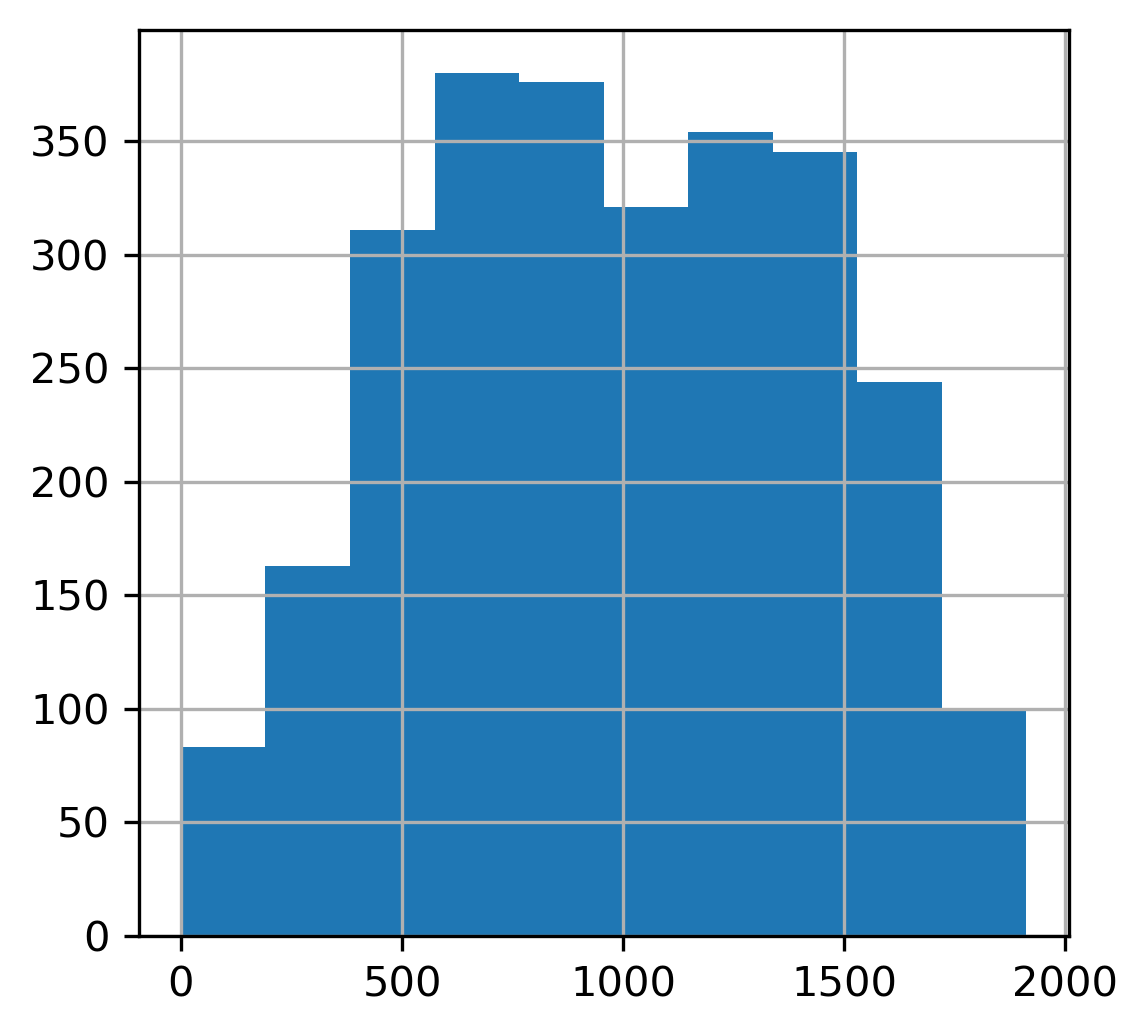

In [34]:
f = plt.figure(figsize=(4,4), dpi=300)
h =  landmarks_sun_frame['pt0_x'].hist()
fig = h.get_figure()

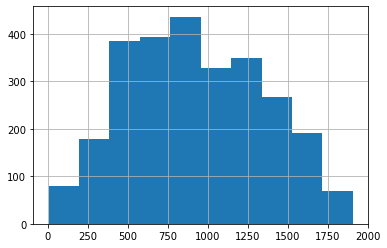

In [35]:
h =  landmarks_sun_frame['pt0_y'].hist()
fig.patch.set_facecolor('white') 
fig = h.get_figure()

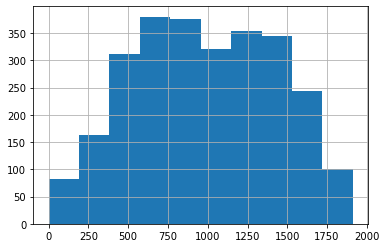

In [36]:
h =  landmarks_sun_frame['pt0_x'].hist()
fig.patch.set_facecolor('white') 
fig = h.get_figure()

In [26]:
landmarks_sun_frame

,img_filename,pt0_x,pt0_y,R
0,img-2018-06-27T08-59-53devID2.jpg,1025.600000,1528.650000,127.332660
1,img-2016-10-25T10-00-01devID2.jpg,659.200000,1562.250000,97.313678
2,img-2017-02-26T07-00-28devID2.jpg,1008.000000,623.050000,119.115675
3,img-2017-02-22T04-00-24devID2.jpg,1508.800000,1429.450000,130.835787
4,img-2015-12-30T05-58-24devID2.jpg,1563.200000,315.850000,155.844928
5,img-2017-03-23T08-00-02devID1.jpg,736.000000,1723.850000,103.672098
6,img-2019-12-08T11-01-21devID1.jpg,1636.800000,450.250000,250.252276
7,img-2017-02-18T06-01-50devID1.jpg,745.600000,738.250000,140.986059
8,img-2019-12-18T12-58-21devID2.jpg,1129.600000,530.250000,220.398011
9,img-2017-03-04T05-59-19devID1.jpg,1537.600000,1394.250000,213.095975


Text(0.5, 0, 'распределение Х координаты')

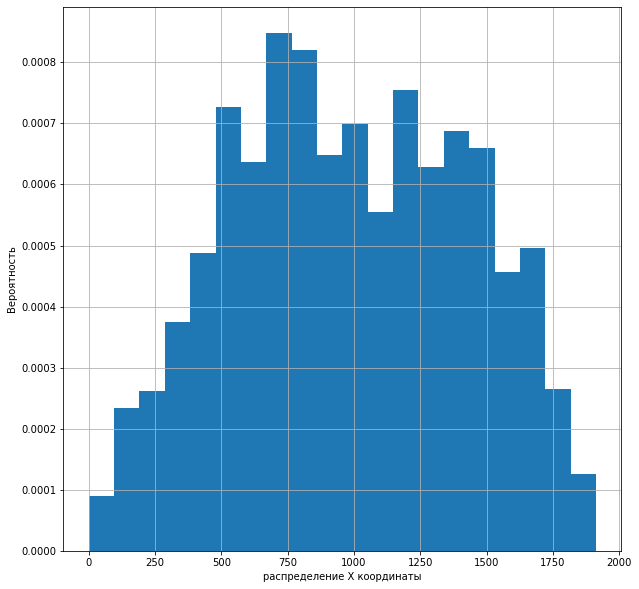

In [48]:
h =  (landmarks_sun_frame['pt0_x']).hist(density = True, bins = 20,figsize = (10,10))
#fig.patch.set_facecolor('white') 
#fig = h.get_figure()
plt.ylabel('Вероятность')
plt.xlabel('распределение Х координаты')

Text(0.5, 0, 'распределение Y координаты')

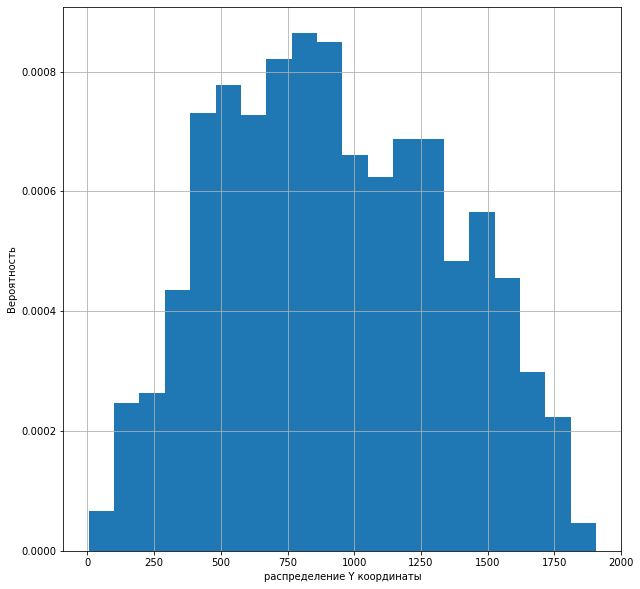

In [52]:
h =  (landmarks_sun_frame['pt0_y']).hist(density = True, bins = 20,figsize = (10,10))
#fig.patch.set_facecolor('white') 
#fig = h.get_figure()
plt.ylabel('Вероятность')
plt.xlabel('распределение Y координаты')

Text(0.5, 0, 'распределение радиуса диска солнца')

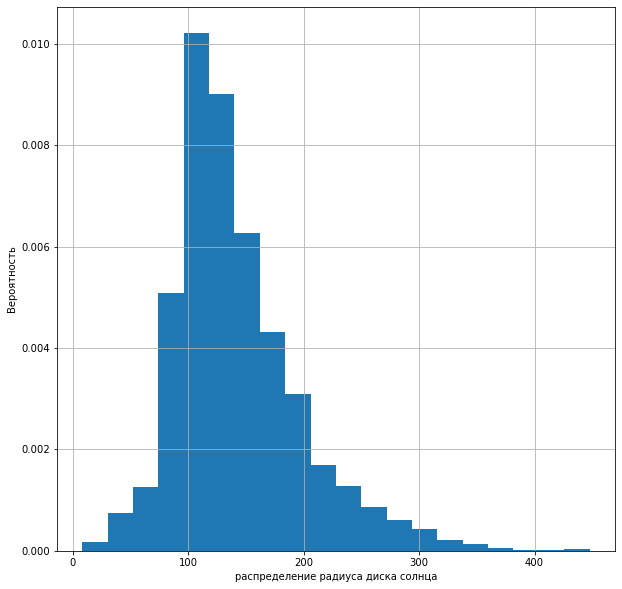

In [53]:
h =  (landmarks_sun_frame['R']).hist(density = True, bins = 20,figsize = (10,10) )
#fig.patch.set_facecolor('white') 
#fig = h.get_figure()
plt.ylabel('Вероятность')
plt.xlabel('распределение радиуса диска солнца')

In [81]:
%matplotlib inline

In [54]:
landmarks_sun_frame['Pif'] = landmarks_sun_frame

,img_filename,pt0_x,pt0_y,R
0,img-2018-06-27T08-59-53devID2.jpg,1025.600000,1528.650000,127.332660
1,img-2016-10-25T10-00-01devID2.jpg,659.200000,1562.250000,97.313678
2,img-2017-02-26T07-00-28devID2.jpg,1008.000000,623.050000,119.115675
3,img-2017-02-22T04-00-24devID2.jpg,1508.800000,1429.450000,130.835787
4,img-2015-12-30T05-58-24devID2.jpg,1563.200000,315.850000,155.844928
5,img-2017-03-23T08-00-02devID1.jpg,736.000000,1723.850000,103.672098
6,img-2019-12-08T11-01-21devID1.jpg,1636.800000,450.250000,250.252276
7,img-2017-02-18T06-01-50devID1.jpg,745.600000,738.250000,140.986059
8,img-2019-12-18T12-58-21devID2.jpg,1129.600000,530.250000,220.398011
9,img-2017-03-04T05-59-19devID1.jpg,1537.600000,1394.250000,213.095975


In [55]:
landmarks_sun_frame['Pif'] =np.sqrt( ((landmarks_sun_frame['pt0_x']-960)**2+(landmarks_sun_frame['pt0_y']-960)**2))
# landmarks_frame_withR['R'] = np.sqrt( np.square(landmarks_frame_withR['pt1_x1920']-landmarks_frame_withR['pt0_x1920']) 
#                             + np.square(landmarks_frame_withR['pt1_y1920']-landmarks_frame_withR['pt0_y1920']))

In [56]:
landmarks_sun_frame

,img_filename,pt0_x,pt0_y,R,Pif
0,img-2018-06-27T08-59-53devID2.jpg,1025.600000,1528.650000,127.332660,572.421333
1,img-2016-10-25T10-00-01devID2.jpg,659.200000,1562.250000,97.313678,673.190688
2,img-2017-02-26T07-00-28devID2.jpg,1008.000000,623.050000,119.115675,340.351734
3,img-2017-02-22T04-00-24devID2.jpg,1508.800000,1429.450000,130.835787,722.194394
4,img-2015-12-30T05-58-24devID2.jpg,1563.200000,315.850000,155.844928,882.484823
5,img-2017-03-23T08-00-02devID1.jpg,736.000000,1723.850000,103.672098,796.016848
6,img-2019-12-08T11-01-21devID1.jpg,1636.800000,450.250000,250.252276,847.291746
7,img-2017-02-18T06-01-50devID1.jpg,745.600000,738.250000,140.986059,308.448411
8,img-2019-12-18T12-58-21devID2.jpg,1129.600000,530.250000,220.398011,462.005652
9,img-2017-03-04T05-59-19devID1.jpg,1537.600000,1394.250000,213.095975,722.630488


Text(0.5, 0, 'распределение расстояния между центром диска солнца и центром снимка')

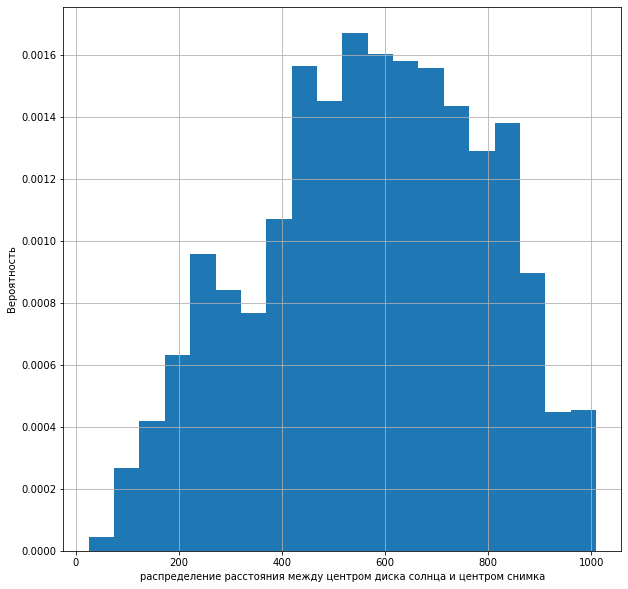

In [58]:
h =  (landmarks_sun_frame['Pif']).hist(density = True, bins = 20,figsize = (10,10) )
plt.ylabel('Вероятность')
plt.xlabel('распределение расстояния между центром диска солнца и центром снимка')